In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import pandas as pd

In [3]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [4]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거 함수
def drop_unnecessary_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    
    return df

# 레이블 인코딩 수행 함수
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = LabelEncoder()
        encoder = encoder.fit(df[feature])
        df[feature] = encoder.transform(df[feature])
    
    return df

# 위 3개의 함수 호출하는 데이터 전처리 함수
def transform_features(df):
    df = fillna(df)
    df = drop_unnecessary_features(df)
    df = format_features(df)
    
    return df

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 데이터 로딩 및 전처리
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

# 학습, 테스트 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2 , random_state=11)

# 학습 및 예측 진행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train) 
pred = lr_clf.predict(X_test)

# 평가 진행
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [10]:
predict_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 Shape : {0}'.format(predict_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출')
print(predict_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병항해 한눈에 보기
pred_proba_result = np.concatenate([predict_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측')
print(pred_proba_result[:3])

pred_proba() 결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출
[[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측
[[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [17]:
print(predict_proba[:,1])

[0.55064773 0.13664488 0.13570355 0.15031481 0.17656589 0.15768776
 0.1290451  0.72771396 0.21814871 0.66814007 0.13821236 0.12941901
 0.13574048 0.12934055 0.43966454 0.14996976 0.11045826 0.25749268
 0.28879775 0.76223727 0.24315893 0.37571831 0.15344752 0.17288741
 0.1317437  0.22996172 0.17053651 0.0966387  0.26627952 0.31152612
 0.92353131 0.7746788  0.12838058 0.75924584 0.37288266 0.22996172
 0.09445724 0.59397424 0.06956414 0.12349478 0.30202577 0.10335406
 0.78006622 0.6843429  0.62057771 0.62067108 0.9283872  0.4422243
 0.92085513 0.13196917 0.49209939 0.12934055 0.14423594 0.6512987
 0.28441583 0.21146798 0.2538079  0.13570998 0.15920996 0.40161937
 0.26467919 0.11294402 0.45447199 0.44673659 0.37416473 0.11636721
 0.64818744 0.60096648 0.91699187 0.14927476 0.13221179 0.16929074
 0.12350957 0.94040086 0.21264241 0.12934055 0.283459   0.20840196
 0.79696904 0.13570998 0.7599495  0.62876419 0.91630376 0.15981387
 0.92233282 0.91026752 0.15276922 0.13758468 0.83460272 0.129340

In [16]:
'''
직접 임계값 설정해 해당 임계값을 기준으로 0과 1 값 정하는 fit_transform 메소드 수행하기
'''
from sklearn.preprocessing import Binarizer

X = [[1,-1,2], [2,0,0], [0,1.1,1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [18]:
# 분류 결정 임계값 0.5
custom_threshold = 0.5

pred_proba_1 = predict_proba[:,1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [20]:
# 분류 결정 임계값 0.4로 낮춰보기
custom_threshold = 0.4
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


## 정리 - 임계값 0.4로 설정하고 나서
1. 재현율은 높아졌다. 
2. 정밀도는 낮아졌다. 
> 임계값보다 높은 값은 Positive로, 낮거나 같은 값은 Negative로 설정하는 것을 기억해야 한다. 임계값이 0.5일 때는 Negative와 Positive의 발생 확률이 50%로 같았다면, 임계값이 0.4로 내려오면 Positive는 60%, Negative는 40%를 차지하는 것이다. 즉, Positive 값이 많아져 상대적으로 재현율이 올라가고 정밀도가 떨어지는 것이다. 

In [22]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_1, thresholds):
    # thresholds 리스트 내 값을 차례로 반복하며 평가하기
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
        custom_predict = binarizer.transform(pred_proba_1)
        print('임계값 = ',custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, predict_proba[:, 1].reshape(-1, 1), thresholds)

임계값 =  0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임계값 =  0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임계값 =  0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임계값 =  0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임계값 =  0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


## 정리
- 임계값이 높아질수록 재현율은 낮아지고, 정밀도는 커진다. 
    -> 임계값에 따라 positive와 negative가 차지할 수 있는 비율을 생각하면 쉽다. 

In [29]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape = ', thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개 : ', thr_index)
print('샘플용 10개의 임계값 : ', np.round(thresholds[thr_index], 2))
print('샘플 임계값별 정밀도 : ', np.round(precisions[thr_index], 2))
print('샘플 임계값별 재현율 : ', np.round(recalls[thr_index], 2))

반환된 분류 결정 임곗값 배열의 shape =  (147,)
샘플 추출을 위한 임계값 배열의 index 10개 :  [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값 :  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도 :  [0.38 0.42 0.45 0.52 0.62 0.68 0.8  0.93 0.96 1.  ]
샘플 임계값별 재현율 :  [1.   0.97 0.9  0.9  0.9  0.82 0.77 0.66 0.44 0.21]


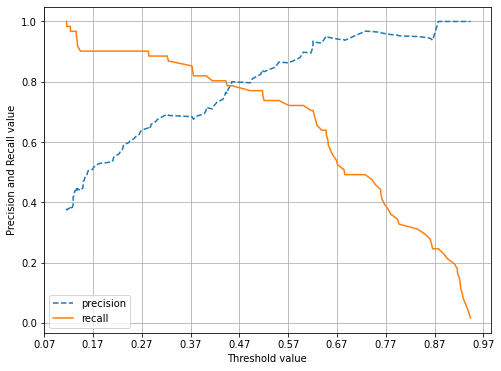

In [41]:
'''
정밀도와 재현율 곡선을 시각화하기
'''
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_1):
    # threshold ndarray와 임계값에 따른 정밀도와 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_1)
    
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 나타내는 X 축 scale을 0.1로 변경, 눈금(tick) 표시하기
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # 축에 레이블 이름 설정하기 
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    # plot() 함수에서 label로 범례 지정한 것 나타내기, 그래프에 격자 표시하기
    plt.legend(); plt.grid()
    # 그래프 화면에 나타내기
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [42]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어 = {0:.4f}'.format(f1))

F1 스코어 = 0.7966


In [43]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 = {0:.4f}, 정밀도 = {1:.4f}, 재현율 = {2:.4f}, F1 = {3:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

임계값 =  0.4
오차 행렬
[[97 21]
 [11 50]]
정확도 = 0.8212, 정밀도 = 0.7042, 재현율 = 0.8197, F1 = 0.7576
임계값 =  0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도 = 0.8547, 정밀도 = 0.7869, 재현율 = 0.7869, F1 = 0.7869
임계값 =  0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도 = 0.8659, 정밀도 = 0.8246, 재현율 = 0.7705, F1 = 0.7966
임계값 =  0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도 = 0.8715, 정밀도 = 0.8654, 재현율 = 0.7377, F1 = 0.7965
임계값 =  0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도 = 0.8771, 정밀도 = 0.8980, 재현율 = 0.7213, F1 = 0.8000
